### Problem Statement : 
The goal of this project is to build a machine learning model that predicts whether a passenger survived the Titanic shipwreck based on features such as age, gender, ticket class, and family relationships. This is a binary classification problem using supervised learning techniques.

### Understanding the business case :
Although based on a historical event, this challenge simulates a real-world scenario where data-driven decisions can impact human lives. It helps early-career data scientists practice the full data science workflow — from data cleaning and feature engineering to model evaluation and deployment. The project also highlights how social and economic factors can influence outcomes, making it both technically and ethically insightful.

### Data Understanding :
The dataset includes information about 891 passengers in the training set and 418 in the test set. Features include:

**PassengerId:** A unique identifier assigned to each passenger. It has no predictive value and is typically excluded from modeling.

**Survived:** The target variable indicating whether a passenger survived (1) or not (0). This is what the model aims to predict.

**Pclass:** Indicates the passenger’s ticket class — 1st, 2nd, or 3rd. It serves as a proxy for socio-economic status and is a strong predictor of survival.

**Name:** The full name of the passenger, which includes titles like Mr., Miss, or Master. These titles can be extracted to infer social status or approximate age group.

**Sex:** The gender of the passenger. This is a highly influential feature, as survival rates differed significantly between males and females.

**Age:** The age of the passenger in years. It helps identify children, adults, and elderly passengers, which can influence survival likelihood. Some values may be missing and require imputation.

**SibSp:** The number of siblings or spouses the passenger had aboard the Titanic. It helps in constructing family-related features such as family size.

**Parch:** The number of parents or children the passenger had aboard. Like SibSp, it contributes to understanding family structure.

**Ticket:** The ticket number. While not directly useful, it can sometimes help identify groups of passengers traveling together.

**Fare:** The fare paid for the ticket. It can reflect the passenger’s wealth or class and may correlate with survival chances.

**Cabin:** The cabin number assigned to the passenger. Many values are missing, but if available, the first letter can be used to infer the deck level.

**Embarked:** The port from which the passenger boarded the Titanic — C (Cherbourg), Q (Queenstown), or S (Southampton). It may reflect regional or class-based differences in survival.


#### Import required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [7]:
# Training data

In [8]:
train_data = pd.read_csv('train.csv')

In [9]:
# Data overview

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The Titanic training dataset contains information about 891 passengers. Most columns are complete, but a few have missing values that need attention before modeling:

Age has 177 missing entries, so we’ll need to fill or estimate those values.

Cabin is missing for most passengers (only 204 non-null), so it may be dropped or simplified.

Embarked has 2 missing values, which can be filled using the most common port.

The dataset includes both numerical and categorical features. Columns like Pclass, Sex, Age, Fare, and Family details (SibSp, Parch) will be useful for predicting survival. Categorical columns like Sex and Embarked will need to be encoded before modeling.

This summary helps us understand what preprocessing steps are needed next — such as handling missing values, encoding categories, and engineering new features.

In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Key observations:**

Survival Rate: The mean of Survived is approximately 0.38, meaning around 38% of passengers survived.

Pclass: The average class is 2.3, with most passengers in class 3 (lower class).

Age: The age ranges from 0.42 to 80 years, with a median age of 28. This suggests a mix of children, adults, and elderly passengers.

SibSp and Parch: Most passengers traveled alone — both have medians of 0, but some had up to 8 siblings/spouses or 6 parents/children.

Fare: Fares vary widely, from ₹0 to ₹512, with a median of ₹14.45, indicating a large gap between economic classes.

These insights help guide feature engineering and highlight the importance of handling missing values, especially in Age.

In [16]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Name: All 891 names are unique, which means this column isn't directly useful for modeling. However, we can extract titles (like Mr., Miss, Master) to create a new feature that reflects social status or age group.

Sex: There are two categories — male and female. The majority of passengers are male (577 out of 891), and gender is a strong predictor of survival.

Ticket: There are 681 unique ticket numbers, with some tickets shared by multiple passengers (most frequent ticket appears 7 times). This may help identify groups or families traveling together.

Cabin: Only 204 entries are non-null, and there are 147 unique cabin identifiers. Due to the high number of missing values, this column may be dropped or simplified by extracting deck information (e.g., first letter of cabin).

Embarked: Most passengers boarded from Southampton (S) — 644 out of 889. This feature has 3 categories (S, C, Q) and only 2 missing values, which can be filled using the most frequent value.


In [18]:
# Testing data

In [19]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [21]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
test_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**Test Data Summary :** 
The test set has 418 passengers and no target column (Survived).

Missing values:

Age: 86 missing

Fare: 1 missing

Cabin: heavily missing (only 91 filled)

Sex: 266 males, 152 females — similar to train set.

Embarked: Most passengers boarded from Southampton (S).

Fare ranges from ₹0 to ₹512, with a median of ₹14.45 — wide variation.

Age ranges from 0.17 to 76 years — similar to training data.

Same preprocessing steps (imputation, encoding, feature engineering) must be applied here before prediction.

In [24]:
original_test_data = test_data.copy()

### Exploratory Data Analysis

#### Univariate Analysis

In [27]:
# Training data

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# continuous features 
continuous_features = []
for column in train_data.columns:
    if train_data[column].dtype == 'float64':
        continuous_features.append(column)
print(continuous_features)

['Age', 'Fare']


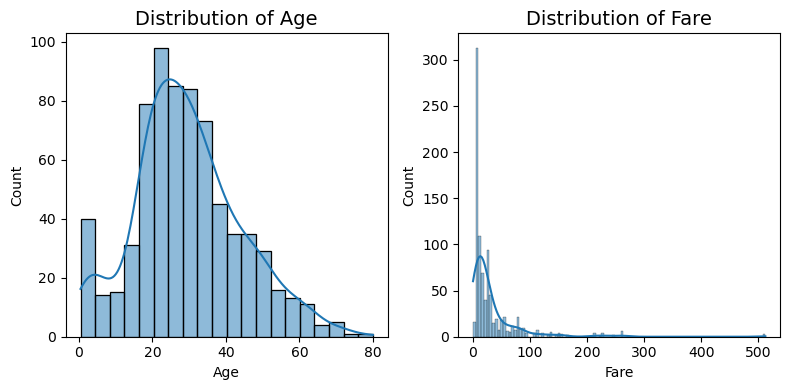

In [30]:
plt.figure(figsize=(8,4),facecolor = 'white')
plotnumber = 1

for column in continuous_features:
    if plotnumber<=4:
        ax = plt.subplot(1,2,plotnumber)
        sns.histplot(train_data[column].dropna(),kde=True)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('Count', fontsize = 10)
        plt.title(f'Distribution of {column}',fontsize = 14)
    plotnumber+=1

plt.tight_layout()
plt.show()

**Observations :**

**1. Age Distribution**

* The age distribution is right-skewed, with most passengers between 20 and 40 years old.
* Very few passengers are under 10 or over 70, suggesting a majority of adult travelers.

**2. Fare Distribution**

* The fare distribution is highly right-skewed, with most passengers paying low fares (under ₹50).
* A few passengers paid extremely high fares (up to ₹512), indicating outliers or first-class luxury travelers.

In [32]:
# Discrete features
discrete_features = []
for column in train_data.columns:
    if train_data[column].dtype == 'int64':
        discrete_features.append(column)
print(discrete_features)

# Filtered discrete features (≤ 50 unique values)
discrete_features1 = []
for column in discrete_features:
    if train_data[column].nunique() <= 50:
        discrete_features1.append(column)

print(discrete_features1)

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
['Survived', 'Pclass', 'SibSp', 'Parch']


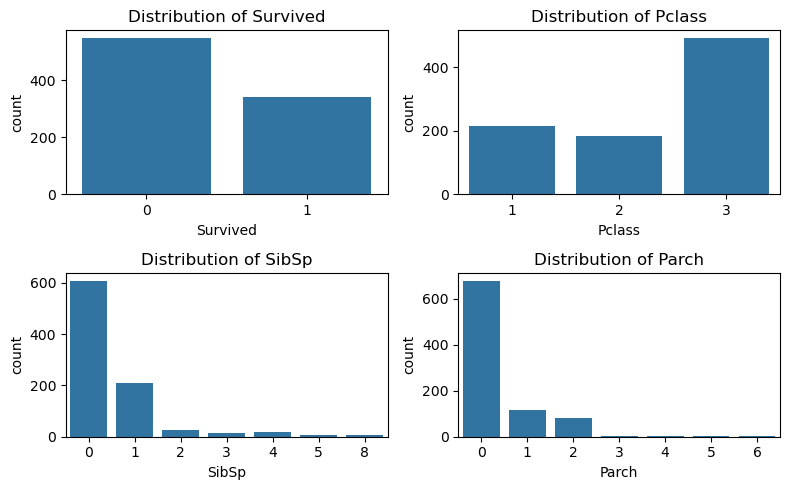

In [33]:
plt.figure(figsize = (8,5) , facecolor = 'white')
plotnumber=1

for column in discrete_features1:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=train_data[column].dropna())
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('count',fontsize = 10)
        plt.title(f'Distribution of {column}',fontsize = 12)
        plotnumber += 1

plt.tight_layout()
plt.show()

**Observations :**

**1. Survived**

* Majority of passengers did not survive (label 0).
* This confirms the dataset is imbalanced, which may affect model performance and needs to be considered during evaluation.

**2. Pclass**

* Most passengers were in class 3, followed by class 1 and class 2.
* Indicates a large number of lower-class travelers, which may correlate with survival rates and fare. 

**3. SibSp (Siblings/Spouses Aboard)**

* Most passengers had no siblings or spouses aboard.
* A few had 1 or 2, and very few had more than that — suggesting most people traveled alone or with one companion.

**4. Parch (Parents/Children Aboard)** 

* Majority had no parents or children aboard.
* Similar to SibSp, this shows most passengers were not traveling with family.  

In [35]:
# Categorical features
categorical_features = []
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        categorical_features.append(column)

print(categorical_features)

# Filtered discrete features (≤ 50 unique values)
categorical_features1 = []
for column in categorical_features:
    if train_data[column].nunique() <= 50:
        categorical_features1.append(column)

print(categorical_features1)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['Sex', 'Embarked']


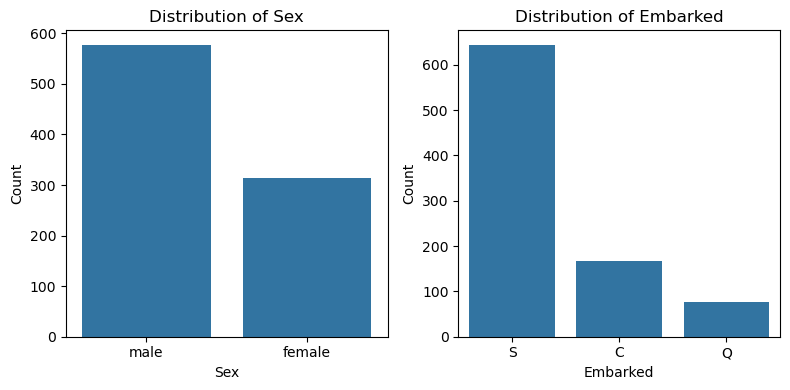

In [36]:
plt.figure(figsize = (8,4),facecolor = 'white')
plotnumber = 1

for column in categorical_features1:
    if plotnumber<=5:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(x=train_data[column].dropna())
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('Count',fontsize = 10)
        plt.title(f'Distribution of {column}',fontsize = 12)
    plotnumber += 1

plt.tight_layout()
plt.show()

**Observations :**

**1. Sex**
  
* The dataset contains more male passengers than female.
* This imbalance is important because gender was a strong predictor of survival in Titanic — females had a higher survival rate.

**2. Embarked**

* Most passengers embarked from port 'S' (Southampton), followed by 'C' (Cherbourg) and 'Q' (Queenstown).
* This reflects the actual boarding pattern of Titanic passengers.
* Embarkation point may correlate with fare, class, or survival, so it’s worth exploring further.

#### Bivariate Analysis

In [39]:
# Continuous variables vs Target

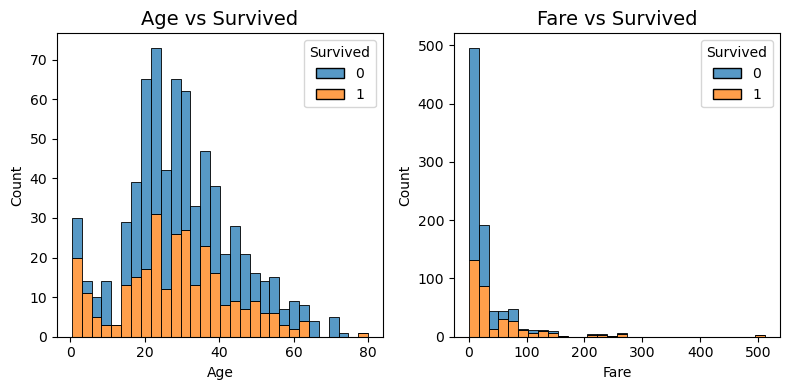

In [40]:
continuous_features = ['Age', 'Fare']

plt.figure(figsize=(8,4),facecolor = 'white')
plotnumber = 1

for column in continuous_features:
    if plotnumber<=4:
        ax = plt.subplot(1,2,plotnumber)
        sns.histplot(data = train_data, x=column, hue='Survived',bins = 30,kde=False,multiple='stack')
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('Count', fontsize = 10)
        plt.title(f'{column} vs Survived',fontsize = 14)
    plotnumber+=1

plt.tight_layout()
plt.show()

**Observations :**

**Age vs Survived**

* Most passengers were aged between 20 and 40, with a peak around 30.
* In this range, non-survivors (blue) clearly outnumber survivors (orange).
* Children under 10 years show a higher survival rate — more orange than blue.
* As age increases beyond 40, both survival and non-survival counts drop, indicating fewer elderly passengers.

**Fare vs Survived**
    
* Majority of passengers paid fares between ₹0 and ₹100.
* In this low-fare range, non-survivors dominate, suggesting lower-class passengers had reduced survival chances.
* For fares above ₹300, the number of survivors slightly exceeds non-survivors, indicating that higher fare (likely first-class) passengers had better survival odds.

In [42]:
# Discrete Variables vs Target

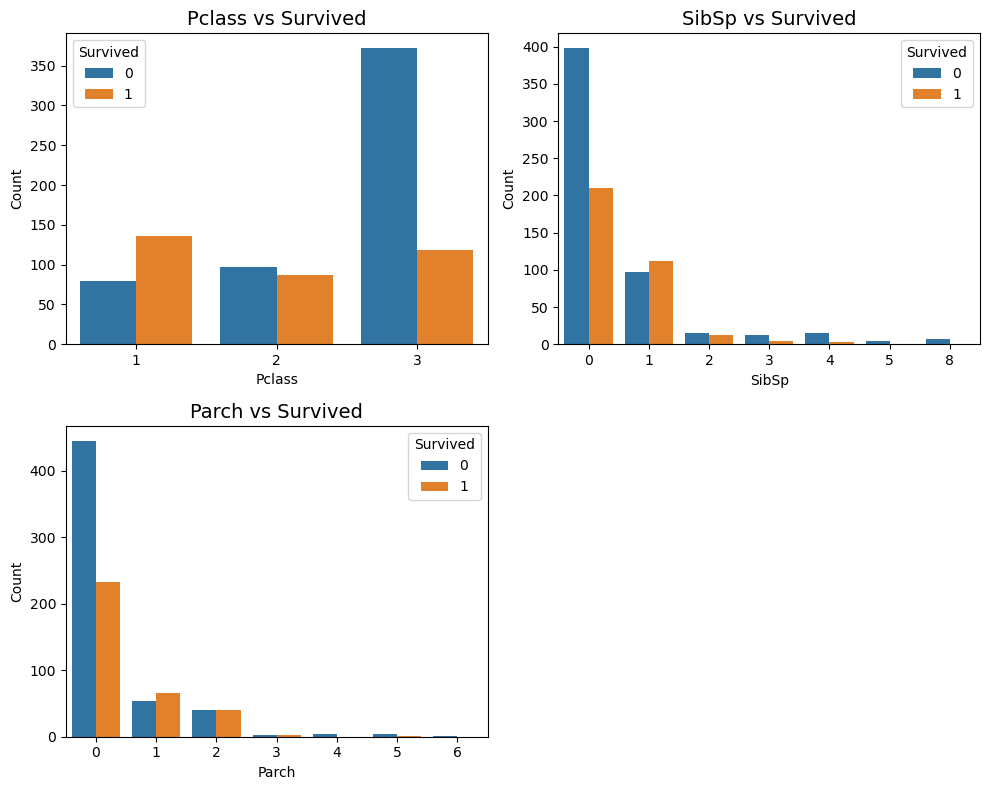

In [43]:
discrete_features = ['Pclass', 'SibSp', 'Parch']

plt.figure(figsize=(10,8),facecolor = 'white')
plotnumber = 1

for column in discrete_features:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(data = train_data, x=column, hue='Survived')
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('Count', fontsize = 10)
        plt.title(f'{column} vs Survived',fontsize = 14)
    plotnumber+=1

plt.tight_layout()
plt.show()

**Observations :**

**Pclass vs Survived**

* 1st class passengers had the highest survival rate — more survivors than non-survivors.
* 2nd class showed a balanced survival pattern.
* 3rd class passengers had the lowest survival rate — non-survivors dominated.
* Interpretation: Higher class meant better access to lifeboats and safety protocols.

**SibSp vs Survived**

* Passengers with 1 sibling/spouse had better survival odds.
* Those with 0 or ≥3 SibSp had lower survival rates.

**Parch vs Survived**

* Most passengers had Parch = 0 (no parents/children aboard), and among them, non-survivors dominated.
* Passengers with Parch = 1 or 2 had noticeably higher survival rates — orange bars taller than blue.
* For Parch ≥ 3, both survival and total passenger count dropped sharply, and non-survivors outnumbered survivors.

* Interpretation :Traveling with 1–2 family members may have increased survival odds — possibly due to mutual support or priority during evacuation.
* Being alone or in large family groups reduced survival chances, likely due to logistical challenges or delayed response.

In [45]:
# Categorical Variables vs Target

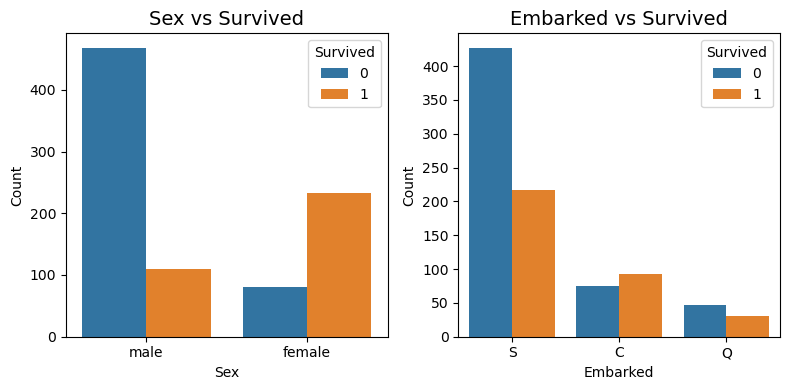

In [46]:
categorical_feature = ['Sex', 'Embarked']

plt.figure(figsize=(8,4),facecolor = 'white')
plotnumber = 1

for column in categorical_feature:
    if plotnumber<=5:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data = train_data, x=column, hue='Survived')
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('Count', fontsize = 10)
        plt.title(f'{column} vs Survived',fontsize = 14)
    plotnumber+=1

plt.tight_layout()
plt.show()

**Observation :**

**Sex vs Survived**

* Females had a significantly higher survival rate — orange bars (survived) are taller than blue.
* Males had a much lower survival rate — blue bars dominate.
* Interpretation: Women were prioritized during evacuation, leading to higher survival odds.

**Embarked vs Survived** 

* Passengers who embarked from Cherbourg (C) had the highest survival rate.
* Queenstown (Q) showed moderate survival.
* Southampton (S) had the lowest survival rate — more non-survivors than survivors.
* Interpretation: Embarkation point may reflect class distribution or cabin location, indirectly affecting survival chances.


#### Data Preprocessing

**Delete Unwanted feature**

In [50]:
train_data.drop(columns='PassengerId',inplace=True)
test_data.drop(columns='PassengerId',inplace=True)

In [51]:
# Creating new feature using SibSp and Parch
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

**Checking missing values**

In [53]:
train_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
dtype: int64

In [54]:
# Calculate the percentage of missing values for each column
missing_percentage = train_data.isnull().mean() * 100

# Display the missing percentages
print(missing_percentage)

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           19.865320
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin         77.104377
Embarked       0.224467
FamilySize     0.000000
dtype: float64



The Cabin feature contains approximately 77% missing values, making it highly sparse and unreliable for direct analysis. While it's possible to extract cabin initials (e.g., deck letters) from this feature, they primarily reflect the passenger's location on the ship or indirectly indicate their class.

Since we already have the Pclass feature, which effectively captures class-related information, the added value from Cabin is minimal. Therefore, I have decided to drop the Cabin feature from the dataset to maintain a clean and interpretable feature set.

In [56]:
train_data = train_data.drop('Cabin',axis=1)
test_data = test_data.drop('Cabin',axis=1)

**Data Imputation**

In [58]:
# Checking which features have missing values in test_data
test_data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age           86
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
FamilySize     0
dtype: int64

In [59]:
# Calculating medians for age and fare from train data

age_median = train_data['Age'].median()
fare_median = train_data['Fare'].median()

In [60]:
# Fill missing values in train and test data using train medians

train_data['Age'].fillna(age_median , inplace=True)
train_data['Fare'].fillna(fare_median , inplace=True)

test_data['Age'].fillna(age_median , inplace=True)
test_data['Fare'].fillna(fare_median , inplace=True)

In [61]:
# replacing null values for embarked with mode

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [62]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [63]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

**Encoding**

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    891 non-null    object 
 10  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Name**

In [67]:
train_data['Name'].nunique()

891

In [68]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [69]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [70]:
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [71]:
test_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [72]:
# Grouping rare and normal titles
title_group = {'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss', 'Master':'Master', 'Don':'Rare', 'Rev':'Rare', 'Dr':'Rare', 'Mme':'Mrs', 'Ms':'Miss',
       'Major':'Rare', 'Lady':'Rare', 'Sir':'Rare', 'Mlle':'Miss', 'Col':'Rare', 'Capt':'Rare', 'Countess':'Rare',
       'Jonkheer':'Rare','Dona':'Rare'}

train_data['Title'] = train_data['Title'].map(title_group).fillna('Rare')
test_data['Title'] = test_data['Title'].map(title_group).fillna('Rare')

In [73]:
title_map = {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4}
train_data['Title'] = train_data['Title'].map(title_map)
test_data['Title'] = test_data['Title'].map(title_map)

In [74]:
train_data.drop(columns='Name',inplace=True)
test_data.drop(columns='Name',inplace=True)

The Name column includes titles like Mr, Miss, and Dr, which can give useful information about a passenger’s social status, gender, and age. These factors can affect the chances of survival, so we decided to use this information. We extracted the title from each name using a regular expression. However, some titles were very rare or appeared only in the test data, which could create inconsistencies. To keep things simple and consistent, we grouped the titles into five main categories: Mr, Mrs, Miss, Master, and Rare. This made it easier to encode the data and reduced the risk of overfitting. Rare titles such as Don, Rev, Dr, Col, and Dona were grouped under Rare. Also, similar titles like Ms and Mlle were treated as Miss, and Mme was treated as Mrs. This helped us clean the data and make sure both training and testing sets used the same title categories.

**Sex**

In [77]:
# Ecoding 'Sex' in training and testing separately
train_sex_encoded = pd.get_dummies(train_data['Sex'], drop_first=True).astype(int)
test_sex_encoded = pd.get_dummies(test_data['Sex'], drop_first=True).astype(int)

# Alighn Coulmns to avoid mismatch
test_sex_encoded = test_sex_encoded.reindex(columns=train_sex_encoded.columns, fill_value=0)

# Assign back to original datasets
train_data['Sex'] = train_sex_encoded
test_data['Sex'] = test_sex_encoded

**Ticket**

In [79]:
train_data['Ticket'].nunique()

681

In [80]:
train_data.drop(columns='Ticket', inplace=True)
test_data.drop(columns='Ticket', inplace=True)

Dropping the Ticket Feature

The Ticket column contains highly unstructured and mostly numeric values with minimal interpretability. While some tickets include alphanumeric prefixes, the majority are unique or purely numeric, making encoding difficult and sparse. To maintain a clean and efficient feature set, the Ticket column was dropped due to its high cardinality, low signal, and poor modeling utility.

**Embarked**

In [83]:
print(train_data['Embarked'].unique())
print(test_data['Embarked'].unique())

['S' 'C' 'Q']
['Q' 'S' 'C']


In [84]:
train_data['Embarked'] = train_data.Embarked.map({'S':0, 'C':1, 'Q':2})
test_data['Embarked'] = test_data.Embarked.map({'S':0, 'C':1, 'Q':2})

**Check for outliers in continuous features**

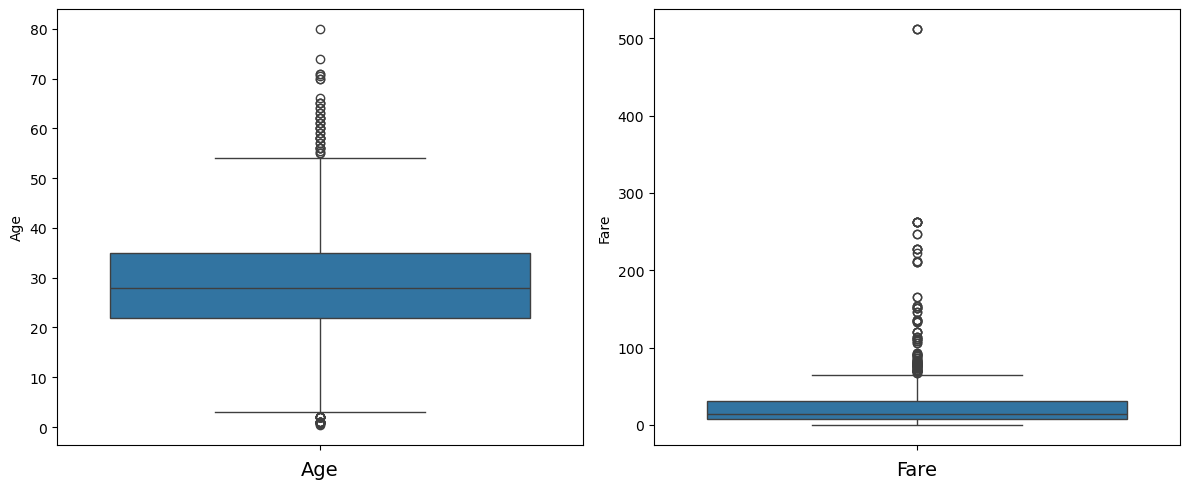

In [86]:
continuous_features = ['Age','Fare']
plt.figure(figsize=(12,5))

plotnumber=1
for column in continuous_features:
    if plotnumber<=2:
        ax=plt.subplot(1,2,plotnumber)
        sns.boxplot(train_data[column])
        plt.xlabel(column, fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

**Outlier Handling**

In [88]:
def remove_outliers(data, column):
    Q1 =train_data[column].quantile(0.25)
    Q3 =train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = train_data[column].median() 
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x) 
    return sns.boxplot(x=column,data=data)

<Axes: xlabel='Age'>

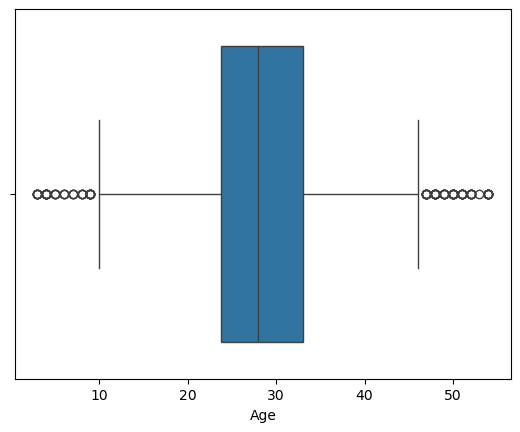

In [89]:
remove_outliers(train_data,'Age')

<Axes: xlabel='Fare'>

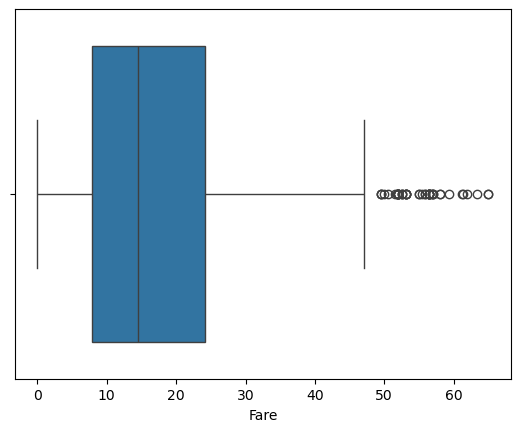

In [90]:
remove_outliers(train_data,'Fare')

<Axes: xlabel='Age'>

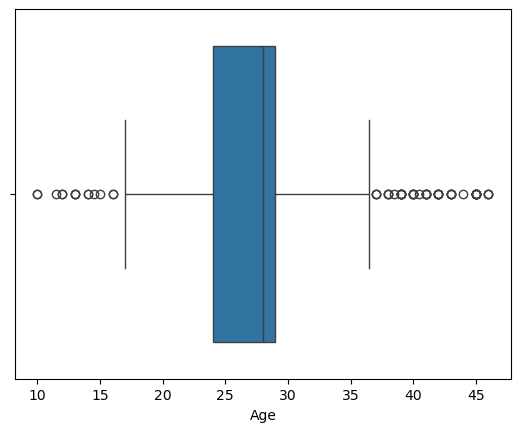

In [91]:
remove_outliers(test_data,'Age')

<Axes: xlabel='Fare'>

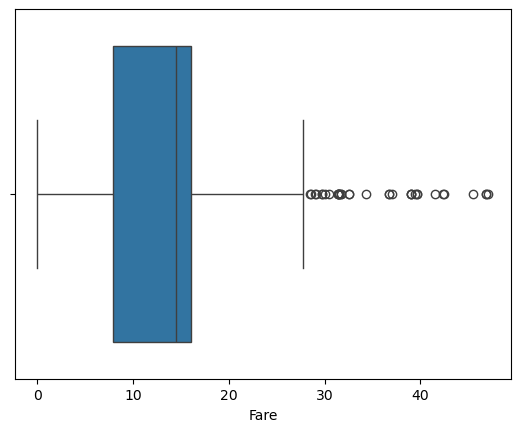

In [92]:
remove_outliers(test_data,'Fare')

**Feature Selection**

In [94]:
# Checking for multicolllinearity

<Axes: >

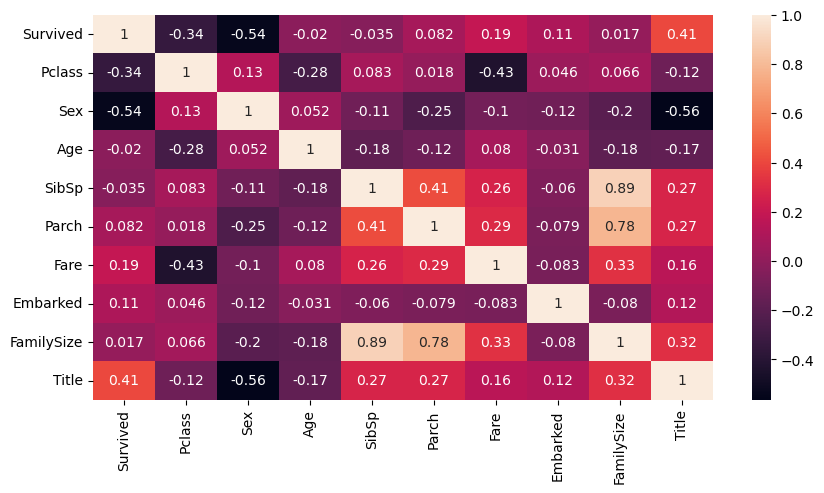

In [95]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(), annot=True)

**Scaling**

In [97]:
scaler = StandardScaler()
scale_cols = ['Age','Fare','Pclass','SibSp','Parch','FamilySize']
scaler.fit(train_data[scale_cols]) # fit on train

# transform train and test
train_data[scale_cols] = scaler.transform(train_data[scale_cols])
test_data[scale_cols] = scaler.transform(test_data[scale_cols])

In [98]:
# Final merge
# separting remaining features 
train_rest = train_data.drop(columns = scale_cols)
test_rest = test_data.drop(columns = scale_cols)

In [99]:
# Combining scaled and remaining features
train_data = pd.concat([pd.DataFrame(train_data[scale_cols], columns=scale_cols), train_rest], axis=1)
test_data = pd.concat([pd.DataFrame(test_data[scale_cols], columns=scale_cols), test_rest], axis=1)

#### Model Creation

**Split independent and dependent features**

In [102]:
X_train = train_data.drop(columns = ['Survived'])
y_train = train_data['Survived']

In [103]:
X_test = test_data

In [104]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [105]:
sm = SMOTE(random_state=42)
print("Before SMOTE:", Counter(y_train))
X_train, y_train = sm.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 549, 1: 342})
After SMOTE: Counter({0: 549, 1: 549})


In [106]:
from sklearn.metrics import accuracy_score

**3. Random Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier 

rf_clf = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=1)  
rf_clf.fit(X_train,y_train)  

RandomForestClassifier(n_jobs=1, random_state=42)

In [109]:
y_train_pred = rf_clf.predict(X_train)

In [110]:
a_=accuracy_score(y_train,y_train_pred)
a_

0.9808743169398907

In [111]:
y_pred = rf_clf.predict(X_test)

**Hyperparameter Tunning**

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define base model
rf = RandomForestClassifier(random_state=42)

# Step 2: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [None, 5, 10, 15],            # Tree depth
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples at leaf node
    'max_features': ['auto', 'sqrt']           # Number of features to consider at each split
}

# Step 3: Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Step 4: Fit on balanced training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Step 6: Use best model for prediction
best_rf = grid_search.best_estimator_
y_pred1 = best_rf.predict(X_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Accuracy: 0.8415857202158572


In [114]:
#Create submission DataFrame
submission_rf_h= pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],  # Make sure this column is preserved
    'Survived': y_pred1
})

In [115]:
# Save to CSV
submission_rf_h.to_csv('submission_rf_h.csv', index=False)